<a href="https://colab.research.google.com/github/ola-sumbo/Car-frontend/blob/master/Skeletal_Extraction_eye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving datasets.zip to datasets.zip


In [2]:
!unzip /content/datasets.zip 

Archive:  /content/datasets.zip
mapname:  conversion of  failed
 extracting: test.zip                
 extracting: training.zip            


In [3]:
!unzip /content/test.zip


Archive:  /content/test.zip
   creating: test/
   creating: test/images/
  inflating: test/images/01_test.tif  
  inflating: test/images/02_test.tif  
  inflating: test/images/03_test.tif  
  inflating: test/images/04_test.tif  
  inflating: test/images/05_test.tif  
  inflating: test/images/06_test.tif  
  inflating: test/images/07_test.tif  
  inflating: test/images/08_test.tif  
  inflating: test/images/09_test.tif  
  inflating: test/images/10_test.tif  
  inflating: test/images/11_test.tif  
  inflating: test/images/12_test.tif  
  inflating: test/images/13_test.tif  
  inflating: test/images/14_test.tif  
  inflating: test/images/15_test.tif  
  inflating: test/images/16_test.tif  
  inflating: test/images/17_test.tif  
  inflating: test/images/18_test.tif  
  inflating: test/images/19_test.tif  
  inflating: test/images/20_test.tif  
   creating: test/mask/
 extracting: test/mask/01_test_mask.gif  
 extracting: test/mask/02_test_mask.gif  
 extracting: test/mask/03_test_mask.gif

In [4]:
!unzip /content/training.zip

Archive:  /content/training.zip
   creating: training/
   creating: training/1st_manual/
 extracting: training/1st_manual/21_manual1.gif  
 extracting: training/1st_manual/22_manual1.gif  
 extracting: training/1st_manual/23_manual1.gif  
 extracting: training/1st_manual/24_manual1.gif  
 extracting: training/1st_manual/25_manual1.gif  
 extracting: training/1st_manual/26_manual1.gif  
 extracting: training/1st_manual/27_manual1.gif  
 extracting: training/1st_manual/28_manual1.gif  
 extracting: training/1st_manual/29_manual1.gif  
 extracting: training/1st_manual/30_manual1.gif  
 extracting: training/1st_manual/31_manual1.gif  
 extracting: training/1st_manual/32_manual1.gif  
 extracting: training/1st_manual/33_manual1.gif  
 extracting: training/1st_manual/34_manual1.gif  
 extracting: training/1st_manual/35_manual1.gif  
 extracting: training/1st_manual/36_manual1.gif  
 extracting: training/1st_manual/37_manual1.gif  
 extracting: training/1st_manual/38_manual1.gif  
 extracting

In [5]:
img_width, img_height = 150,150 #width and height of images
train_data_dir = r"/content/training"
test_data_dir = r"/content/test"
nb_train_sample = 10
nb_test_sample = 10
epochs = 50
batch_size = 5

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format() == "channels_first":
  input_shape=(3,img_width, img_height)
else:
  input_shape=(img_width, img_height, 3)

In [6]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
import matplotlib.pyplot as plt


In [7]:
# importing required libraries
import pandas as pd
%matplotlib inline
from matplotlib import patches

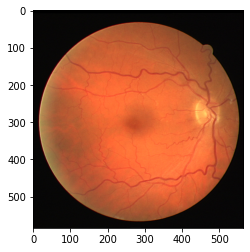

In [8]:
# reading single image using imread function of matplotlib
image = plt.imread('/content/training/images/22_training.tif')
plt.imshow(image)

In [ ]:
image.shape

(584, 565, 3)

In [10]:
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

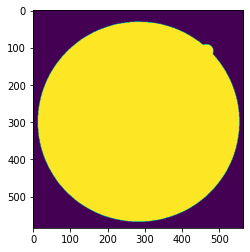

In [ ]:
# reading single image using imread function of matplotlib
image = plt.imread('/content/training/mask/22_training_mask.gif')
plt.imshow(image)

**Denoising the data both test and train samples**

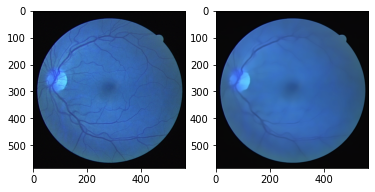

In [20]:
import numpy as np
import cv2 as cv, cv2
from matplotlib import pyplot as plt
img = cv.imread('/content/test/images/01_test.tif')
dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()

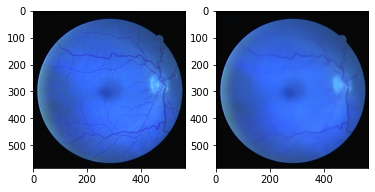

In [16]:
img_train = cv.imread('/content/training/images/22_training.tif')
dst_train = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img_train)
plt.subplot(122),plt.imshow(dst_train)
plt.show()

**Using Gaussian Blur to compare denoising**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


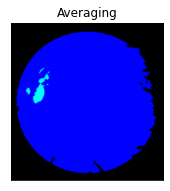

In [50]:
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(1,2,1),plt.imshow(img),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.subplot(1,2,1),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]),plt.yticks([])
cv2.imwrite('/content/test/images/01_test.tif', blur)
plt.show()

In [ ]:
def sp_noise(image, prob):
  skel = np.zeros(img.shape, np.uint8)


**Skeletal Extraction**

In [33]:
# Import the necessary libraries
import cv2
import numpy as np

# Read the image as a grayscale image
img = cv2.imread('/content/training/images/22_training.tif', 0)

# Threshold the image
ret,img = cv2.threshold(img,127, 255, 0)

# Step 1: Create an empty skeleton
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

In [25]:
# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

In [26]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  65710      0 --:--:-- --:--:-- --:--:-- 65710


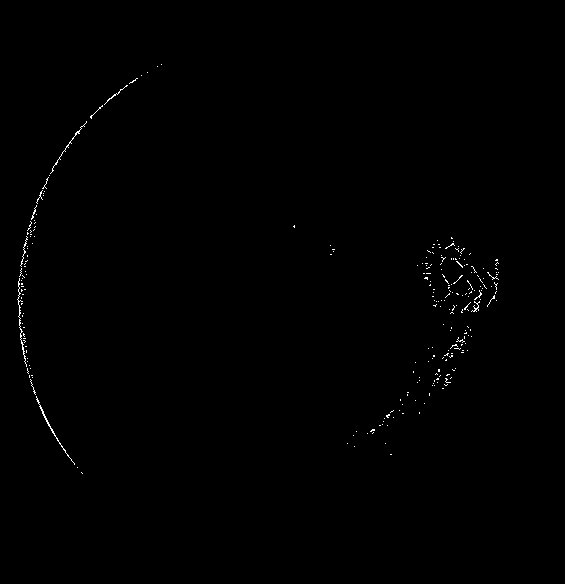

In [ ]:
# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break
# Displaying the final skeleton
cv2_imshow(skel)
cv2.waitKey(0)
cv2.destroyAllWindows()      

**Extraction of skeleton for denoised data from Gaussian Blur**

In [38]:
# Threshold the image
ret,blur = cv2.threshold(blur,127, 255, 0)

# Step 1: Create an empty skeleton
size = np.size(blur)
skel_blur = np.zeros(blur.shape, np.uint8)

In [51]:
# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(blur, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(blur, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(blur, element)
    skel_blur = cv2.bitwise_or(skel_blur,temp)
    blur = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(blur)==0:
      break
    
# Displaying the final skeleton
cv2_imshow(skel_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()  

error: ignored

**Feature Extraction**

In [ ]:
import numpy as np
feature_matrix = np.zeros((584,565)) 
feature_matrix.shape

(584, 565)

In [ ]:
for i in range(0,image.shape[0]):
    for j in range(0,image.shape[1]):
        feature_matrix[i][j] = ((int(image[i,j,0]) + int(image[i,j,1]) + int(image[i,j,2]))/3)

In [ ]:
features = np.reshape(feature_matrix, (584*565)) 
features.shape

(329960,)

**Another output**

In [58]:
 %cd /content/drive/MyDrive/Colab Notebooks

#run these.

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to pdf Skeletal Extraction-eye.ipynb

/content/drive/MyDrive/Colab Notebooks
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
[NbConvertApp] WARNING | pattern u'Skeletal' matched no files
[NbConvertApp] WARNING | pattern u'Extraction-eye.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the